# Logistic Regression 
- Logistic regression is used to predict a binary response, such as 0/1. 
- It estimates the probability of 0 or 1 as a function of the x factor. 
- It is a linear method, but with a different loss function.

#### About this Notebook
In this notebook, we download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we calculate the high/low emission based on a threshold, and label them as 1/0. Finally, we make a logistic regression, and estimate the probability of a test case to be of high emission class.

### Importing Needed packages
Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget

In [2]:
!wget -O /resources/FuelConsumption.csv https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv

--2015-10-01 19:48:34--  https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
Resolving ibm.box.com (ibm.box.com)... 74.112.184.85, 74.112.185.182
Connecting to ibm.box.com (ibm.box.com)|74.112.184.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ibm.app.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv [following]
--2015-10-01 19:48:39--  https://ibm.app.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
Resolving ibm.app.box.com (ibm.app.box.com)... 74.112.184.87, 74.112.185.87
Connecting to ibm.app.box.com (ibm.app.box.com)|74.112.184.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.boxcloud.com/d/1/yP7T9n8hewzfqUbtaQYyId-B9qBkZI8wX7zXMhaxfL_q5Ow5o0r4t7o5omBeNZcpY4jeaPMzA5CpGgIHBH3lK75GdkmRELot81j3Rp9cUo2qubPGx6GKzudceKWQF3SqCil_1_nRsdy_hriRgFvDT-6GnCg_5Rh7GJMt0SENzpDCDnXVWlXPTUesAs3TQNJEXEIBGmiM41RpDkP1lJACiIcoVJXfhb5cRhCRQxBHevPpN0_YPwrOLB86SwJCx1QHi0FLkx28TNJ8R1


##Understanding the Data

###`FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in

In [3]:
df = pd.read_csv("/resources/FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Labeling Data

CO2EMISSIONS > T  --> High --> 1  
CO2EMISSIONS < T  --> Low  --> 0


In [5]:
# To label data
df['Em']=df['CO2EMISSIONS'].map(lambda x: 1 if x> 294 else 0)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Em
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0


## Data Exploration

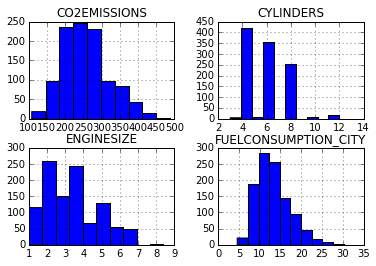

In [6]:
viz=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

In [7]:
pd.crosstab(df['MAKE'], df['Em'], rownames=['VEHICLECLASS'])


Em,0,1
VEHICLECLASS,,
ACURA,12,0
ASTON MARTIN,0,7
AUDI,36,13
BENTLEY,0,8
BMW,52,12
BUICK,16,0
CADILLAC,22,10
CHEVROLET,58,28
CHRYSLER,17,2


In [8]:
pd.crosstab(df['CYLINDERS'], df['Em'], rownames=['VEHICLECYLINDERS'])


Em,0,1
VEHICLECYLINDERS,,
3,4,0
4,420,0
5,9,0
6,325,31
8,58,194
10,0,9
12,0,17


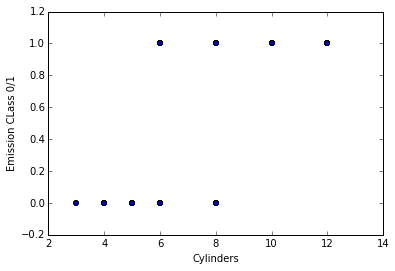

In [9]:
plt.scatter(df.CYLINDERS, df.Em)
plt.xlabel("Cylinders")
plt.ylabel("Emission CLass 0/1")
plt.show()

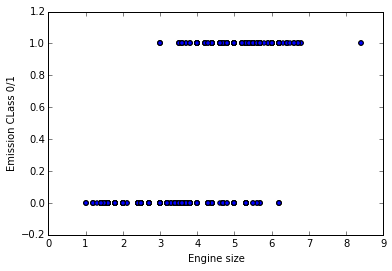

In [10]:
plt.scatter(df.ENGINESIZE, df.Em)
plt.xlabel("Engine size")
plt.ylabel("Emission CLass 0/1")
plt.show()

### What about linear regression?

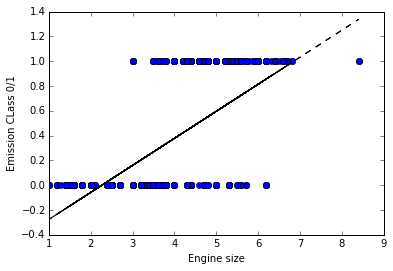

In [11]:
fit = np.polyfit(df.ENGINESIZE, df.Em, 1)
fit_fn = np.poly1d(fit) 
plt.plot(df.ENGINESIZE, df.Em, 'bo', df.ENGINESIZE, fit_fn(df.ENGINESIZE), '--k')
plt.xlabel("Engine size")
plt.ylabel("Emission CLass 0/1")
plt.show()

### Creating train dataset

In [12]:
train_data = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
# manually add the intercept
train_data['intercept'] = 1.0
train_data.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,intercept
0,4,2.0,9.9,6.7,8.5,1
1,4,2.4,11.2,7.7,9.6,1
2,4,1.5,6.0,5.8,5.9,1
3,6,3.5,12.7,9.1,11.1,1
4,6,3.5,12.1,8.7,10.6,1


### Making Logistic Regression model
We use **Statsmodels** to make the LR model 

**Features:**
- 'CYLINDERS'
- 'ENGINESIZE'
- 'FUELCONSUMPTION_CITY'
- 'FUELCONSUMPTION_HWY'
- 'FUELCONSUMPTION_COMB'  

**Target:**
- 'Em'

In [13]:
logit = sm.Logit(df['Em'], train_data)
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.181629
         Iterations 9


In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Em   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1061
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Oct 2015   Pseudo R-squ.:                  0.6671
Time:                        19:48:42   Log-Likelihood:                -193.80
converged:                       True   LL-Null:                       -582.08
                                        LLR p-value:                1.358e-165
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
CYLINDERS                1.3062      0.232      5.621      0.000         0.851     1.762
ENGINESIZE               0.5786      0.244      2.374      0.018         0.101     1.056
FUELCONSUMPTION_CITY    -3.4771      2.607     -1.334      0.182        -8.587     1.633
FUELCONSUMPTION_HWY     -1.2457      2.156     -0.578      0.563        -5.471     2.979
FUELCONSUMPTION_COMB     5.3331      4.747      1.123      0.261        -3.972    14.638
intercept              -16.3977      1.249    -13.131      0.000       -18.845   -13.950
========================================================================================
"""

### Prediction of a test case
Here we test the model with a car

In [15]:
test_case1=[8,8.4,12.7,9.1,11.1,1]
result.predict(test_case)

NameError: name 'test_case' is not defined

### Prediction using a test set
We select all cars of a brand and predict the probablity of being in high emission class (i.e. Em=1)

In [ ]:
test_case2=df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']][df.MAKE=='LINCOLN']
test_case2['intercept ']=1
test_case2.head()

In [ ]:
np.set_printoptions(precision=2)
print result.predict(test_case2)


### Prediction of emission class using a syntatic dataset
We create a test dataset from all combinations of Cylinders and Engine sizes and predict their class

In [ ]:
def cartesian(arrays, out=None):

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [ ]:
CYLINDERS = df['CYLINDERS'].unique()
ENGINESIZE  = np.linspace(df['ENGINESIZE'].min(), df['ENGINESIZE'].max(), 10)
FUELCONSUMPTION_CITY= df['FUELCONSUMPTION_CITY'].mean()
FUELCONSUMPTION_HWY= df['FUELCONSUMPTION_HWY'].mean()
FUELCONSUMPTION_COMB = df['FUELCONSUMPTION_COMB'].mean()
test_case3 = pd.DataFrame(cartesian([ CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB, [1.]]))
test_case3.columns = ['CYLINDERS', 'ENGINESIZE','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','intercept']
test_case3.head()

### Prediction of test_data

In [ ]:
result.predict(test_case3)
# make predictions on the enumerated dataset
test_case3['emission_pred'] =result.predict(test_case3)
test_case3.head()

In [ ]:
grouped=pd.pivot_table(test_case3,values=['emission_pred'], rows=['CYLINDERS','ENGINESIZE'] ,aggfunc=np.mean)
grouped.head()

# Visualization

In [ ]:
# make a plot

eng_sizes=(test_case3.ENGINESIZE.unique()).tolist()
for col in test_case3.CYLINDERS.unique():
    plt_data = grouped.ix[grouped.index.get_level_values(0)==col]
    plt.plot(eng_sizes,plt_data['emission_pred'])
labels=map(str,eng_sizes)
plt.xticks(eng_sizes,labels,rotation=70)
plt.xlabel("Engine size")
plt.ylabel("P(Emission=1)")
plt.legend(test_case3.CYLINDERS.unique(), loc=5, title='Cyl')
plt.title("Prob(Emission=1) isolating Cylanders and Enginesize")
plt.show()


### Contact the Notebook Authors

1. **[Saeed Aghabozorgi](https://ca.linkedin.com/in/saeedaghabozorgi), Data Scientist, IBM.** saeed[at]ca.ibm.com  
1. **[Polong Lin](https://ca.linkedin.com/in/polonglin), Data Scientist, IBM.** polong[at]ca.ibm.com